# Strojenie parametrów - czyli jak znaleźć najlepszy model?

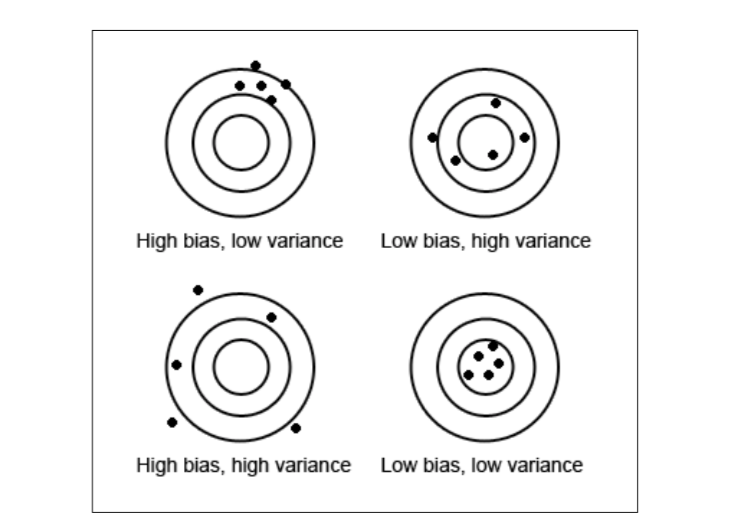

In [50]:
import numpy as np
import pandas as pd
np.random.seed(123) 

In [51]:
data=pd.read_csv('heart.csv')

In [52]:
y = np.array(data['chd'])
X = data.drop(['chd'],axis=1)

In [53]:
map_dict = {'Present': 1, 'Absent':0}
X['famhist'] = X['famhist'].map(map_dict)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


### Podział na train, test

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

### Drzewo decyzyjne

In [55]:
from sklearn.tree import DecisionTreeClassifier
#parametry domyślne
tree_model= DecisionTreeClassifier()

In [56]:
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
tree_model.fit(X_train, y_train);

In [58]:
tree_model.score(X_test, y_test)

0.6344086021505376

### Kroswalidacja

In [61]:
import sklearn
from sklearn.model_selection import cross_val_score
tree_model= DecisionTreeClassifier()
results=cross_val_score(tree_model, X, y) # można zdefiniować: scoring='roc_auc'
# uwaga: tutaj nie strojono parametrów więc można użyć całego zbioru
print(np.mean(results), np.std(results))

0.6535998129967275 0.019444406586017843


In [62]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

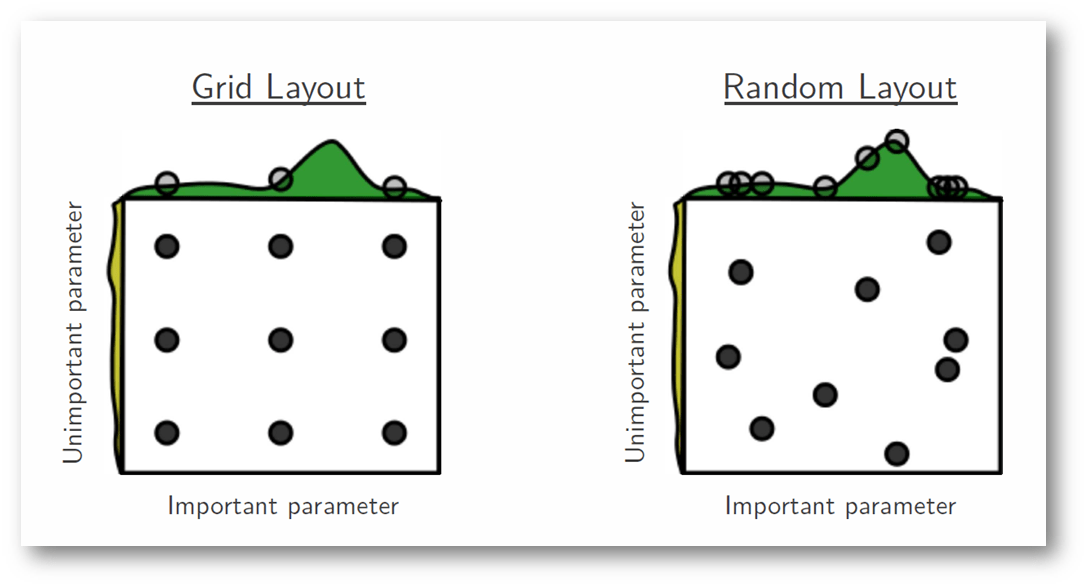

### Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
max_depth=[3, 5, 6]
criterion=["gini","entrophy"]
ccp_alpha=[0, 0.05]
param_grid = dict(max_depth=max_depth,criterion=criterion, ccp_alpha=ccp_alpha)

In [65]:
tree_model= DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv = 3, n_jobs=-1)

grid_result = grid.fit(X_train, y_train) #tutaj lepiej zastosować tylko trainset

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.680217 using {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}


In [71]:
mean_test_scores = grid_result.cv_results_['mean_score_time']
std_test_scores = grid_result.cv_results_['std_score_time']
mean_train_scores = grid_result.cv_results_['mean_fit_time']
#std_train_scores = grid_result.cv_results_['std_fit_time']
parameters = grid_result.cv_results_['params']

for mean_test, std_test, params in zip(mean_test_scores, std_test_scores, parameters):
    print('Parameters : {}'.format(params))
    print('Mean test score: {:.8f}'.format(mean_test))
    print('Standard Deviation (test) : {:.8f}'.format(std_test))
    print()

print('Best parameters : {}'.format(grid_result.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_result.best_score_))


Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}
Mean test score: 0.00332459
Standard Deviation (test) : 0.00046997

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5}
Mean test score: 0.00316374
Standard Deviation (test) : 0.00024097

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 6}
Mean test score: 0.00299486
Standard Deviation (test) : 0.00081167

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 3}
Mean test score: 0.00000000
Standard Deviation (test) : 0.00000000

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 5}
Mean test score: 0.00000000
Standard Deviation (test) : 0.00000000

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 6}
Mean test score: 0.00000000
Standard Deviation (test) : 0.00000000

Parameters : {'ccp_alpha': 0.05, 'criterion': 'gini', 'max_depth': 3}
Mean test score: 0.00332514
Standard Deviation (test) : 0.00047261

Parameters : {'ccp_alpha': 0.05, 'criter

In [ ]:
best_model=grid_result.best_estimator_
best_model.score(X_test, y_test)

przykład wizualizacji:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

### Random Search 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, cv = 3, n_jobs=-1)

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

In [ ]:
best_model=random_result.best_estimator_
best_model.score(X_test, y_test)

- Zdefiniowanie rozkładów

In [67]:
from scipy.stats import poisson,expon
param_grid = {'ccp_alpha': expon(0.08),
             'max_depth': poisson(5)}

In [68]:
random = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, cv = 3, n_jobs=-1, random_state=123)

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

NameError: name 'RandomizedSearchCV' is not defined

https://ksopyla.com/machine-learning/grid-random-search-scikit-learn-dobor-parametrow/

## Bayes optimization

In [141]:
#!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from sklearn.svm import SVC

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html

## Jak robić strojenie parametrów dla różnych modeli?
- http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
- https://stackoverflow.com/questions/50265993/alternate-different-models-in-pipeline-for-gridsearchcv

## automl from sklearn
(działa tylko na Linuxie - rozwiązanie: korzystać z Google Colaboratory)

In [150]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_pred = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_pred))

ModuleNotFoundError: No module named 'autosklearn'

### TPOT

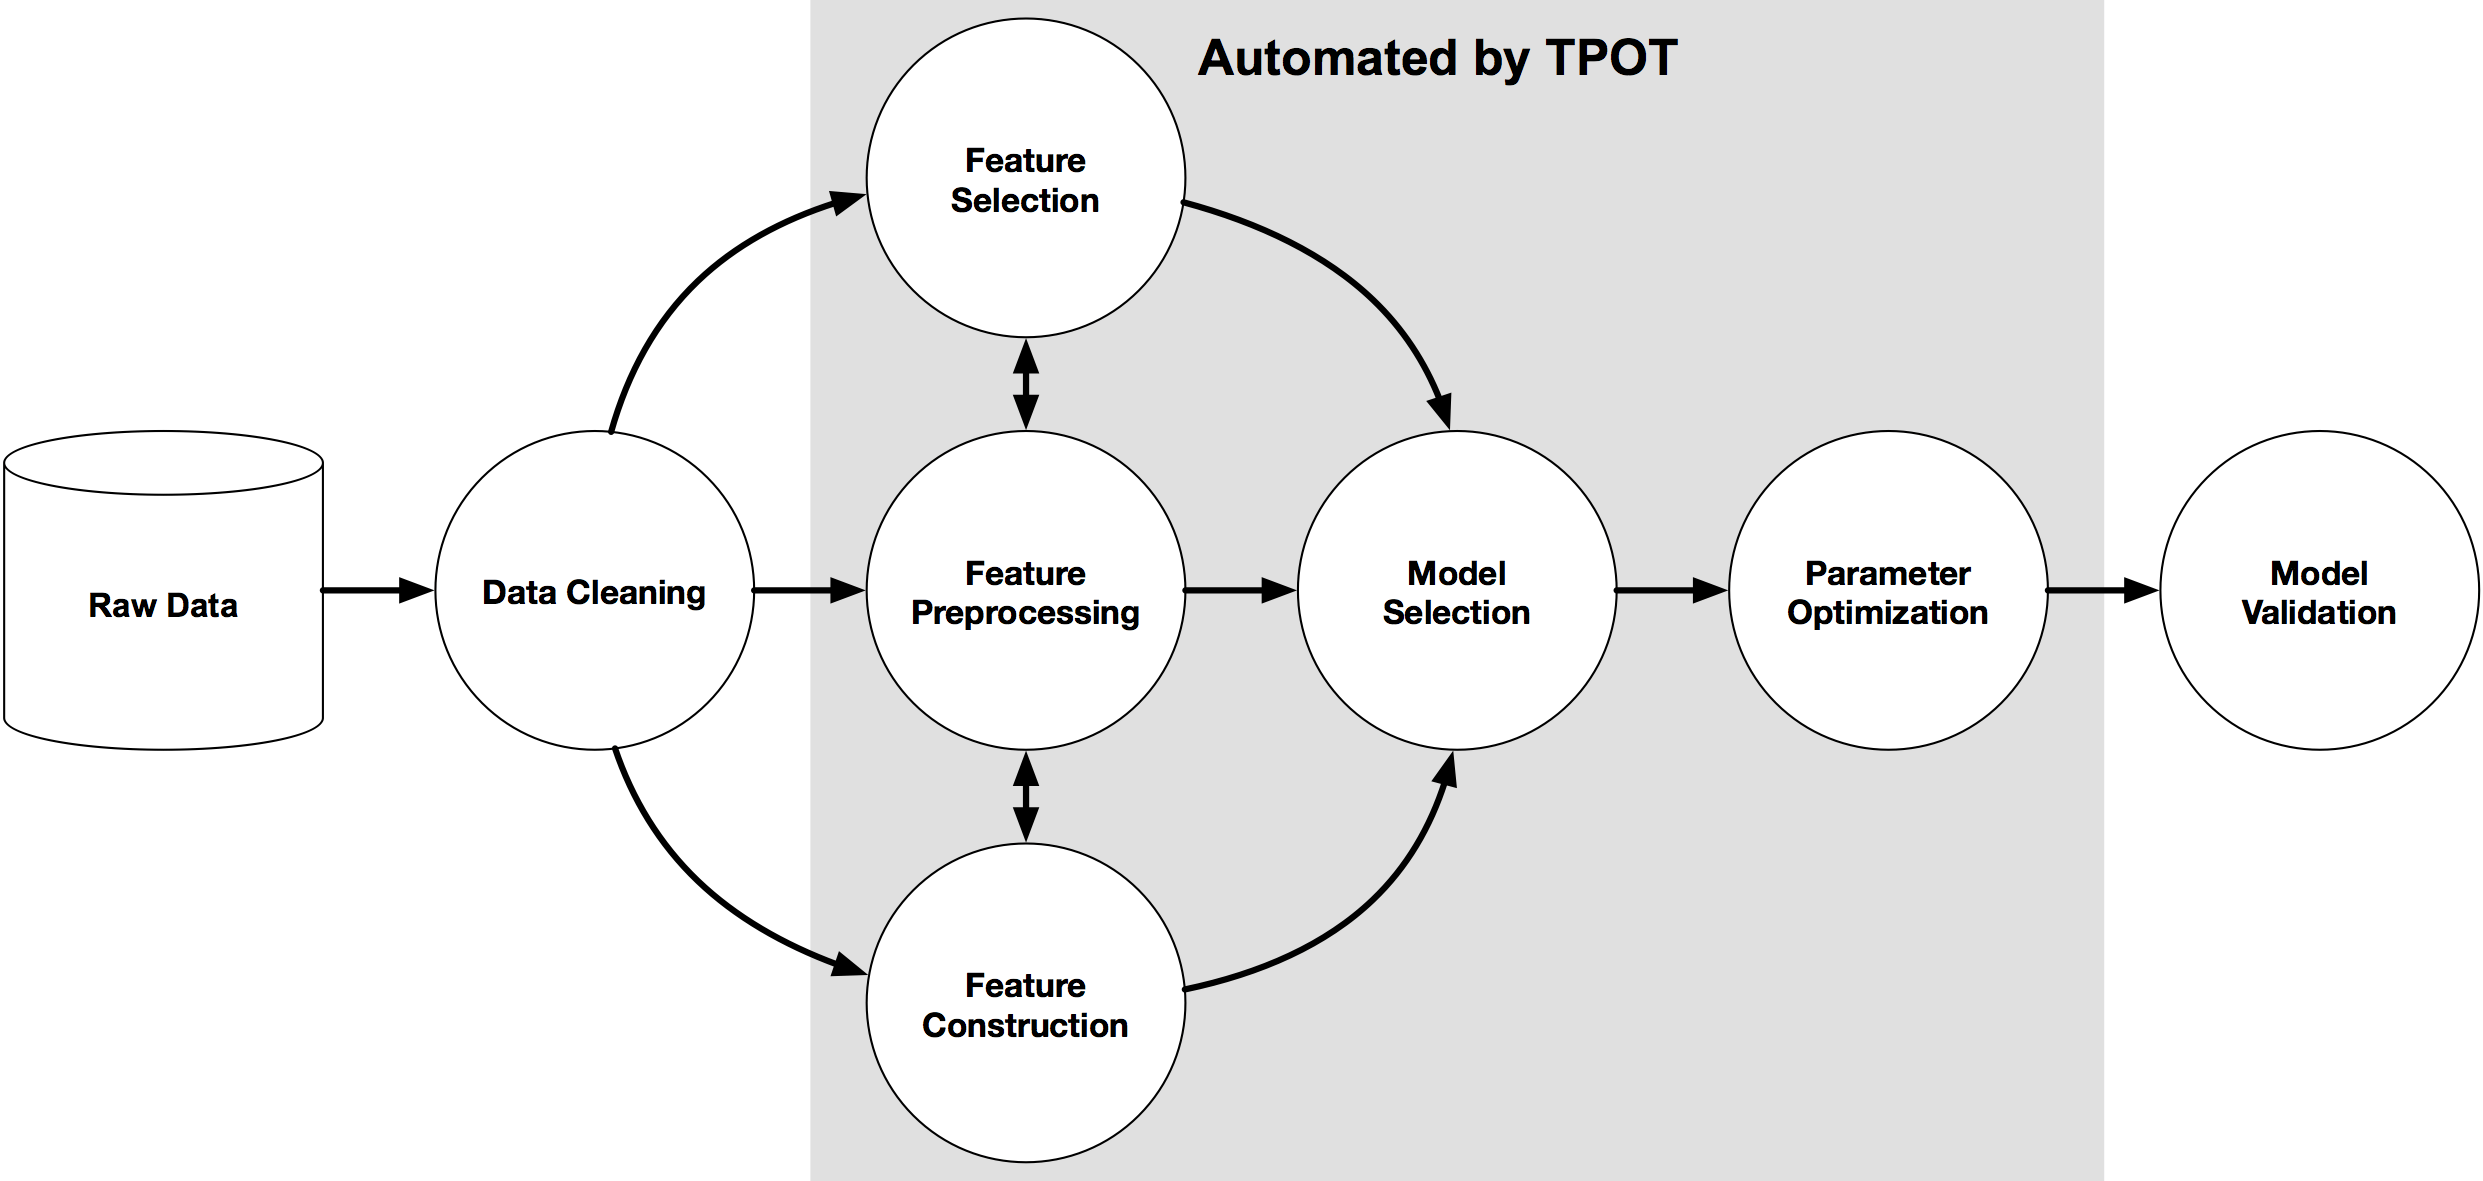

In [64]:
# ! pip install tpot

  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11961 sha256=1265cefd2a437a918d6e125c78582c3a71bdcca22f1eed904b65f615d56c6a3c
  Stored in directory: C:\Users\Paulina\AppData\Local\pip\Cache\wheels\3c\85\2b\2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [65]:
from tpot import TPOTClassifier
#from tpot import TPOTRegressor

tpot = TPOTClassifier(generations=5,verbosity=2)

tpot.fit(X_train, y_train)

C:\Users\Paulina\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Generation 1 - Current best internal CV score: 0.7371343946686413
Generation 2 - Current best internal CV score: 0.7371343946686413
Generation 3 - Current best internal CV score: 0.7398741206960385
Generation 4 - Current best internal CV score: 0.7398741206960385
Generation 5 - Current best internal CV score: 0.7425768233987412

Best pipeline: LinearSVC(GaussianNB(input_matrix), C=10.0, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [66]:
tpot.score(X_test, y_test)

0.6989247311827957

## Feature importance

In [34]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

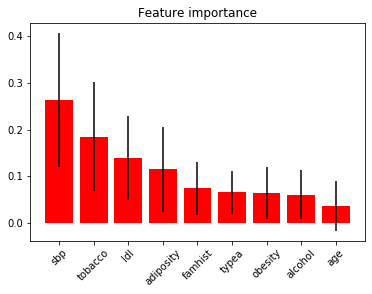

In [35]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


plt.figure()
plt.title("Feature importance")
plt.bar(X.columns, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(rotation=45)
plt.show()

## Selekcja zmiennych

### SelectKBest (na podstawie algorytmu ANOVA)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

pipe = Pipeline([
    ('select', SelectKBest()),
    ('model', tree_model)])

search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

### Recursive Feature Elimination

In [44]:
from sklearn.feature_selection import RFE
estimator = tree_model
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train) 

In [45]:
print(selector.support_)
selector.ranking_

[False False  True False False False  True False  True]


array([4, 3, 1, 6, 7, 2, 1, 5, 1])

### Boruta

In [155]:
#!pip install boruta

In [48]:
from boruta import BorutaPy
# for classification only (we need to convert pd.DataFrame to np.array)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train.values, y_train)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_test.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3
Iteration: 	17 / 

## Misc

Different embeddings for columns in pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Problem niezbalansowania klas

In [ ]:
#!pip install imbalanced-learn

In [79]:
import imblearn
from imblearn.over_sampling import SMOTE

In [85]:
print(X_train.shape)
pd.Series(y_train).value_counts()
# akurat tutaj ten balans jest w miarę ok, ale dla celów demonstracyjnych zrobimy na nim upsample

(369, 9)


0    242
1    127
dtype: int64

In [86]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [87]:
print(X.shape)
pd.Series(y).value_counts()

(484, 9)


1    242
0    242
dtype: int64